데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐 아니라 어떤 모델을 사용하는지에 따라 다릅니다.
아주 폭넓게 사용하는 두 알고리즘인 선형 모델과 트리 기반 모델(결정 트리,그레이디언트 부스팅 트리, 랜덤포레스트 등)은 특성의 표현 방식으로 인해 미치는 영향이 매우 다릅니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor

# 구간분할,이산화

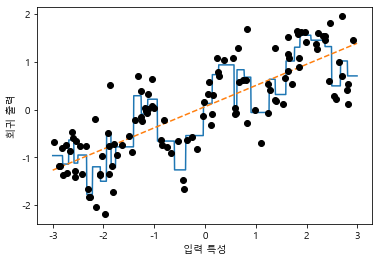

In [2]:
x,y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

reg=DecisionTreeRegressor(min_samples_leaf=3).fit(x,y)
plt.plot(line,reg.predict(line),label='결정 트리')

reg = LinearRegression().fit(x,y)
plt.plot(line,reg.predict(line),'--',label="선형 회귀")

plt.plot(x[:,0],y,'o',c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.show()

선형 모델은 선형 관계로만 모델링하므로특성이 하나일 땐 직선으로 나타납니다. 
결정 트리는 이 데이터로 훨씬 복잡한 모델을 만들 수 있습니다. 

그러나 이는 데이터의 표현 형태에 따라 굉장히 달라집니다. 

연속형 데이터에 아주 강력한 선형 모델을 만드는 방법 하나는 한 특성을 여러 특성으로 나누는 구간 분할입니다.(이산화라고도 합니다.) 

이 특성의 입력값 범위가 나뉘어 여러 구간으로, 예를 들어 10개로 되어있다고 생각해봅시다.
그렇다면 각 데이터 포인트가 어떤 구간에 속하는지 바로 나타낼 수 있습니다.

구간의 경계를 정의하는데는 여러 방법이 있습니다. 예를 들어 균일한 너비로(즉 구간의 경계 간의 거리가 동일하게)하거나 데이터의 분위를 사용할 수 있습니다.(즉 데이터가 많은 구간은 좁아집니다.)

KBinsDiscretizer 클래스에 이런 방법들이 구현 되어 있습니다.

In [3]:
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
kb= KBinsDiscretizer(n_bins = 10,strategy='uniform')
kb.fit(x)
print("bin edges: \n",kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


첫 번째 구간은 특성의 값이 -2.967(데이터에서 가장 작은 값)부터 -2.378까지 모든 데이터 포인트를 담습니다.
두 번째 구간은 -2.378부터 -1.789 사이인 모든 데이터 포인트를 포함합니다. 이런식으로 계속됩니다.

KBinsDiscretizer는 한 번에 여러 개의 특성에 적용할 수 있습니다. bin_edges_는 특성별로 경곗값이 저장되어 있습니다. 이 경우에는 길이가 1인 배열이 출력됩니다.

transform 메서드를 사용하면 각 데이터 포인트를 해당되는 구간으로 인코딩할 수 있습니다. 기본적으로 KBinsDiscretizer는 구간에 원 핫 인코딩을 적용합니다. 구간마다 하나의 새로운 특성이 생기므로 희소 행렬을 만듭니다. 10개의 구간을 지정했기 때문에 변환된 데이터는 10차원입니다.

In [5]:
x_binned = kb.transform(x)
x_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

희소 행렬을 밀집 배열로 변환하여 원본 데이터 포인트와 인코딩 결과를 비교해보겠습니다.

In [6]:
print(x[:10])
x_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

첫 번째 데이터 포인트 -0.753이 네번째 구간에 들어갔습니다. 두번째 데이터 포인트 2.704는 열번째 구간에 포함되었습니다. 이런식으로 계속됩니다.

여기에서 wave 데이터셋에 있는 연속형 특성을 각 데이터 포인트가 어느 구간에 속했는지 원 핫 인코딩한 범주형 특성으로 변환하였습니다. encode='ordinal'로 설정하면 원 핫 인코딩된 구간의 인덱스를 바로 계산할 수 있지만 유용하지는 않습니다.

예제를 간단하게 만들기 위해 encode='onehot-dense'로 지정하여 원 핫 인코딩된 밀집 배열을 만들겠습니다. 그러면 모든 특성을 바로 출력할 수 있습니다.

In [7]:
kb=KBinsDiscretizer(n_bins=10,strategy='uniform',encode='onehot-dense')
kb.fit(x)
x_binned=kb.transform(x)

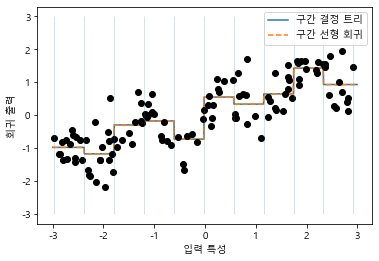

In [8]:
#원 핫 인코딩된 데이터로 선형회귀 모델과 결정 트리모델 새로 만들기

line_binned=kb.transform(line)

reg=DecisionTreeRegressor(min_samples_split=3).fit(x_binned,y)
plt.plot(line,reg.predict(line_binned),label='구간 결정 트리')

reg = LinearRegression().fit(x_binned,y)
plt.plot(line,reg.predict(line_binned),'--',label="구간 선형 회귀")

plt.plot(x[:,0],y,'o',c='k')
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.legend(loc='best')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.show()

선형 회귀 모델과 결정 트리가 같은 예측을 만들어내서 파선과 실선이 완전히 겹쳐졌습니다.
구간별로 이 두 모델이 예측한 것은 상숫값입니다. 각 구간 안에서는 특성의 값이 상수이므로 어떤 모델이든 그 구간의 포인트에 대해서는 같은 값을 예측할 것입니다. 구간으로 나눈 특성을 사용하기 전과 비교해보면, 각 구간에서 다른 값을 가지고 있으므로 선형 모델이 훨씬 유연해진 것을 알 수 있습니다. 반면에 결정트리는 덜 유연해졌습니다. 트리 모델은 데이터를 자유롭게 나눠 학습할 수 있으므로 특성의 값을 구간으로 나누는 것이 아무런 득이 되지 않습니다. 다르게 생각하면 결정 트리는 데이터셋에서 예측을 위한 가장 좋은 구간을 학습한다고 볼 수 있습니다. 거기다가 구간 나누기는 특성마다 따로 해야 하지만, 결정 트리는 한번에 여러 특성을 살필 수 있습니다. 하지만 선형 모델은 이런 변환으로부터 큰 이득을 얻었습니다.

일부 특성과 출력이 비선형 관계이지만, 용량이 매우 크고 고차원인 데이터셋이라 선형 모델을 사용해야 한다면 구간 분할이 모델 성능을 높이는 데 아주 좋은 방법이 될 수 있습니다.

# 상호작용과 다항식

특별히 특성을 풍부하게 나타내는 또 하나의 방법은 원본 데이터에 상호작용과 다항식을 추가하는 것입니다. 이런 종류의 특성 공학은 통계적 모델링에서 자주 사용하지만 일반적인 머신러닝 애플리케이션에도 많이 적용합니다.

위 그래프에서 선형 모델은 wave데이터셋의 각 구간에 대해 상숫값을 학습했습니다. 그런데 선형 모델은 이런 절편 외에도 기울기도 학습할 수 있습니다. 선형 모델에 기울기를 추가하는 방법은 구간으로 분할된데이터에 원래 특성(위 그래프에서 x축)을 다시 추가하는 것입니다. 이렇게 하면 11차원 데이터셋이 만들어집니다.

In [9]:
x_combined=np.hstack([x,x_binned])

print(x_combined.shape)

(120, 11)


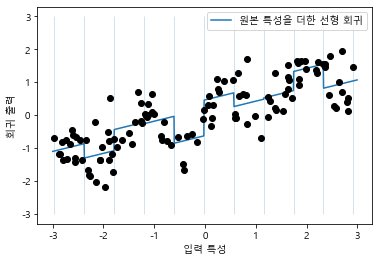

In [10]:
reg = LinearRegression().fit(x_combined,y)
line_combined = np.hstack([line,line_binned])
plt.plot(line,reg.predict(line_combined),label="원본 특성을 더한 선형 회귀")
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.legend(loc='best')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(x[:,0],y,'o',c='k')
plt.show()

이 예에서 이 모델은 각 구간의 절편과 기울기를 학습했습니다. 학습된 기울기는 양수이고 모든 구간에 걸쳐 동일합니다.

즉 x축 특성이 하나이므로 기울기도 하나입니다.
기울기가 모든구간에서 같은 것보다 각 구간에서 다른 기울기를 가지는 것이 좋아보입니다.
이런 효과를 위해서 데이터 포인트가 있는 구간과 x축 사이의 상호작용 특성을 추가할 수 있습니다. 이 특성이 구간 특성과 원본특성의 곱입니다. 

In [11]:
x_product =np.hstack([x_binned,x*x_binned])
print(x_product.shape)

(120, 20)


데이터셋은 이제 데이터 포인트가 속한 구간과 이 구간에 원본 특성을 곱한 값을 더해 20개의 특성을 가집니다. 이 곱셈 특성을 각 구간에 대한 x축 특성의 복사본이라고 생각할 수 있습니다. 즉 이 값은 구간 엔에서는 원본 특성이고 다른 곳에서는 0입니다.

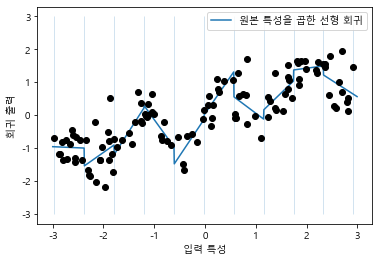

In [12]:
reg = LinearRegression().fit(x_product,y)
line_product = np.hstack([line_binned,line*line_binned])
plt.plot(line,reg.predict(line_product),label="원본 특성을 곱한 선형 회귀")
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.legend(loc='best')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(x[:,0],y,'o',c='k')
plt.show()

이 그림에서 볼 수 있듯이 이 모델에서는 각 구간에서 절편과 기울기가 모두 다릅니다.

구간 나누기는 연속형 특성을 확장하는 방법 중 하나입니다. 원본 특성의 다항식을 추가하는 방법도 있습니다.
특성 x가 주어지면 x ** 2, x ** 3, x ** 4 등을 시도해볼 수 있습니다.

이 방식이 preprocessing 모듈의 PolynomialFeatures에 구현되어 있습니다.

In [13]:
from sklearn.preprocessing import PolynomialFeatures

#x**10까지 고차항을 추가합니다.
#기본값인 "include_bias = True"는 절편에 해당하는 1인 특성을 추가합니다.
poly = PolynomialFeatures(degree=10,include_bias=False)
poly.fit(x)
x_poly = poly.transform(x)

10차원을 사용했으므로 10개의 특성이 만들어집니다.

In [14]:
print(x_poly.shape)

(120, 10)


In [15]:
print("x 원소: \n",x[:5])
print("x_poly 원소: \n",x_poly[:5])

x 원소: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
x_poly 원소: 
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


각 특성의 차수를 알려주는 get_feature_names_out 메서드를 사용해 특성의 의미를 알 수 있습니다. 

In [16]:
print("항 이름: \n",poly.get_feature_names_out())

항 이름: 
 ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


x_poly의 첫 열은 x와 같고 다른 열은 첫 번째 열의 거듭제곱입니다. 그래서 어떤 값은 매우 크게 나오는 것을 볼 수 있습니다. 두번째 행은 다른 값보다 월등하게 커 20000이 검기도 합니다

다항식 특성을 선형 모델과 함꼐 사용하면 전형적인 다항 회귀 모델이 됩니다.

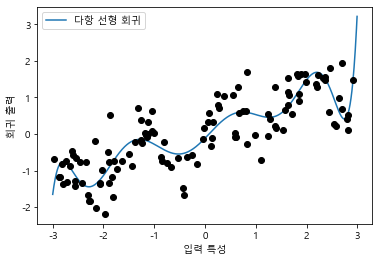

In [17]:
reg = LinearRegression().fit(x_poly,y)
line_poly = poly.transform(line)
plt.plot(line,reg.predict(line_poly),label="다항 선형 회귀")
plt.legend(loc='best')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(x[:,0],y,'o',c='k')
plt.show()

다항식 특성은 1차원 데이터셋에서도 매우 부드러운 곡선을 만듭니다. 그러나 고차원 다항식은 데이터가 부족한 영역에서 너무 민감하게동작합니다. 

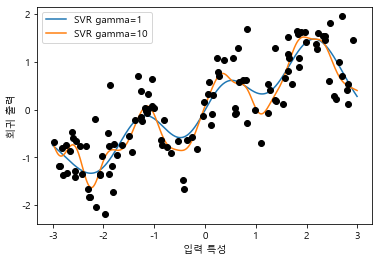

In [18]:
from sklearn.svm import SVR
for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(x,y)
    plt.plot(line,svr.predict(line),label='SVR gamma={}'.format(gamma))
    
plt.legend(loc='best')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(x[:,0],y,'o',c='k')
plt.show()    

비교를 위해 더 복잡한 모델인 커널 SVM을 사용해 특성 데이터를 변환하지 않고 다항 회귀와 비슷한 복잡도를 가진 예측 모델을 만들었습니다. 

상호작용과 다항식을 위한 더 현실적인 애플리케이션으로 보스턴 주택 가격 데이터셋을 이용해보겠습니다.

In [19]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
x_train,x_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)

#데이터 스케일 조정
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [20]:
poly = PolynomialFeatures(degree=2).fit(x_train_scaled)
x_train_poly = poly.transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)
print("x_train.shape:",x_train.shape)
print("x_train_poly.shape:",x_train_poly.shape)

x_train.shape: (379, 13)
x_train_poly.shape: (379, 105)


이 데이터는 원래 특성이 13개인데 105개의 교차 특성으로 확장되었습니다. 새로운 특성은 원래 특성의 제곱은 물론 가능한 두 특성의 조합을 모두 포함합니다.

즉 degree = 2로 하면 원본 특성에서 2개를 뽑아 만들수 있는 모든 곱을 얻을 수 있습니다.

어떤 원본 특성이 곱해져 새 특성이 만들어졌는지 정확환 관계를 보려면 get_features_names 메서드를 사용합니다.

In [21]:
print("다항 특성 이름: \n",poly.get_feature_names())

다항 특성 이름: 
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


첫 번째 특성은 상수항, 즉 1입니다. 다음 13개 특성은 원본 특성('x0 에서 'x12'까지)입니다. 그 다음은 첫 번째 특성의 제곱 항('x0^2)과 첫번째 특성과 다른 특성 간의 조합입니다.

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(x_train_scaled,y_train)
print("상호 작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(x_test_scaled,y_test)))
ridge = Ridge().fit(x_train_poly,y_train)
print("상호 작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(x_test_poly,y_test)))

상호 작용 특성이 없을 때 점수: 0.577
상호 작용 특성이 있을 때 점수: 0.741


상호작용과 다항식 특성이 Ridge의 성능을 크게 높여준 것을 확인 가능합니다.

그러나 랜덤 포레스트같이더 복잡한 모델을 사용하면 이야기가 조금 달라집니다. 

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=0).fit(x_train_scaled,y_train)
print("상호 작용 특성이 없을 때 점수: {:.3f}".format(rf.score(x_test_scaled,y_test)))
rf = RandomForestRegressor(n_estimators=100,random_state=0).fit(x_train_poly,y_train)
print("상호 작용 특성이 있을 때 점수: {:.3f}".format(rf.score(x_test_poly,y_test)))

상호 작용 특성이 없을 때 점수: 0.785
상호 작용 특성이 있을 때 점수: 0.761


특성을 추가하지 않아도 랜덤 포레스트는 Ridge의 성능과 맞먹습니다.

오히려 상호작용과 다항식을 추가하면 성능이 조금 줄어듭니다.

# 일변량 비선형 변환

앞에서 제곱 항이나 세제곱 항을 추가하면 선형 회귀 모델에 도움이 됨을 보았습니다.
한편 log,exp,sin같은 수학 함수를 적용하는 방법도 특성 변환에 유용합니다. 

트리 기반 모델은 특성의 순서에만 영향을 받지만, 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접한 연관되어 있습니다. 그리고 특성과 타깃값 사이에 비선형성이 있다면 특히 선형 회귀에서는 모델을 만들기가 어렵습니다.

log와 exp함수는 데이터의 스케일을 변경해 선형 모델과 신경망의 성능을 올리는 데 도움을 줍니다.

sin과 cos함수는 주기적인 패턴들이 들어 있는 데이터를 다룰 때 편리합니다.

대부분의 모델은 각 특성이 (회귀에서는 타깃도) 정규분포와 비슷할 때 최고의 성능을 냅니다. 즉 특성의 히스토그램이 종 모양과 비슷할 때 입니다. log나 exp같은 함수를 이용하는 것은 편법이지만, 이런 모양을 만드는 쉽고 효과적인 방법입니다. 

이런 변환이 도움되는 전형적인 경우는 정수 카운트 데이터를 다룰 때 입니다.
카운트 데이터란 "사용자가 얼마나 자주 로그인하는가?" 같은 특성을 말합니다.
카운트에는 음수가 없으며 특별한 통계 패턴을 따르는 경우가 많습니다.

In [24]:
rnd = np.random.RandomState(0)
x_org= rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

x= rnd.poisson(10*np.exp(x_org))
y=np.dot(x_org,w)
print(x[:10,0])

[ 56  81  25  20  27  18  12  21 109   7]


첫 번째 특성 맨 앞 10개를 살펴보면 모두 양의 정수이지만 특정한 패턴은 보이지 않습니다.
하지만 각 값이 나타난 횟수를 세면 그 분포가 잘 드러납니다.

In [25]:
print("특성출현 횟수:\n ",np.bincount(x[:,0]))

특성출현 횟수:
  [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


2가 68번으로 가장 많이 나타나며(bincount는 항상 0부터 시작합니다.) 큰 값의 수는 빠르게 줄어듭니다.
그러나 85나 86처럼아주 큰값도 약간 있습니다. 

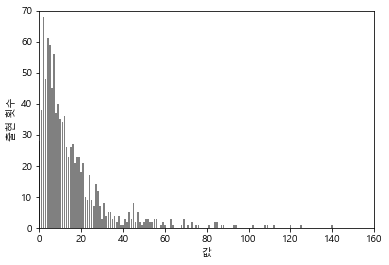

In [26]:
plt.xlim(0,160)
plt.ylim(0,70)
bins = np.bincount(x[:,0])
plt.bar(range(len(bins)),bins,color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")
plt.show()

x[:,1]과 x[:,2] 특성도 비슷합니다. 이런 종류의 분포는 (작은 수치가 많고 큰 수치는 몇 안되는) 실제로 자주 나타납니다.

그러나 선형 모델은 이런 데이터를 잘 처리하지 못합니다.

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
score = Ridge().fit(x_train,y_train).score(x_test,y_test)
print("테스트 점수:{:.3f}".format(score))

테스트 점수:0.622


비교적 낮은 r2 score가 나온 것으로 보아 Ridge는 x와 y의 관계를 제대로 모델링하지 못했습니다.

하지만 로그 스케일로 변환하면 도움이 됩니다. 데이터에 0이 있으면 log 함수를 적용할 수 없으므로 (log 0은 정의 X) log(x+1)을 사용합니다.

In [28]:
x_train_log = np.log(x_train+1)
x_test_log = np.log(x_test+1)

변환 후를 보면 데이터의 분포가 덜 치우쳐 있으며 매우 큰 값을 가진 이상치가 보이지 않습니다.

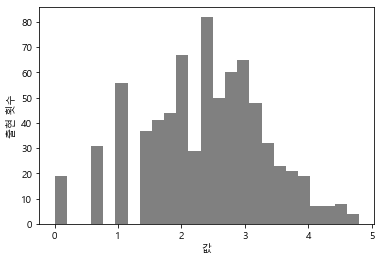

In [29]:
plt.hist(x_train_log[:,0],bins=25,color='gray')
plt.ylabel('출현 횟수')
plt.xlabel('값')
plt.show()

In [30]:
score = Ridge().fit(x_train_log,y_train).score(x_test_log,y_test)
print("테스트점수:  {:.3f}".format(score))

테스트점수:  0.875


데이터셋과 모델의 조합에 최적인 변환 방법을 찾기란 예술에 가까운 일입니다. 
이 예에서는 모든 특성이 같은 속성을 가지고 있습니다. 

하지만 실제로 이런 경우는 드물며, 일부 특성만 변환하거나 특성마다 모두 다르게 변환하기도 합니다. 
앞서 언급한대로 이런 변환은 트리 기반 모델에서는 불필요하지만 선형 모델에서는 필수입니다. 

가끔 회귀에서 타깃 변수 y를 변환하는 것이 좋을 때도 있습니다. 
카운트를 예측하는 경우가 전형적인 예로 log(y+1)을 사용해 변환하면 도움이 됩니다.

이전 예에서 보았듯이 구간 분할, 다항식, 상호작용은 데이터가 주어진 상황에서 모델의 성능에 큰 영향을 줄 수 있습니다.
특별히 선형 모델이나 나이브 베이즈 모델 같은 덜 복잡한 모델일 경우입니다.

반면에 트리 기반 모델은 스스로 중요한 상호작용을 찾아낼 수 있고 대부분의 경우 데이터를 명시적으로 변환하지 않아도 됩니다. 

SVM, 최근접 이웃, 신경망 같은 모델은 이따금 구간 분할, 상호작용, 다항식으로 이득을 볼 수 있지만, 선형 모델보다는 영향이 그렇게 뚜렷하지 않습니다.